In [110]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
crime_2018 = "Resources/2018-19-data_sa_crime.csv"
crime_2019 = "Resources/2019-20-fullyr-data_sa_crime (1).csv"
crime_2020 = "Resources/2020-21_crime_qtr1_and_qtr2 (1).csv"
sa_postcodes = "Resources/australian_postcodes (1).csv"

# Read data files and store into DataFrames
crime_2018_df = pd.read_csv(crime_2018, parse_dates = ['Reported Date'])
crime_2019_df = pd.read_csv(crime_2019, parse_dates = ['Reported Date'])
crime_2020_df = pd.read_csv(crime_2020, parse_dates = ['Reported Date'])
sa_postcodes_df = pd.read_csv(sa_postcodes)

In [111]:
#merging 4 crime datasets into a merged_data dataframe
merged_data = pd.concat([crime_2018_df,crime_2019_df,crime_2020_df], ignore_index=True)

In [112]:
#cleaning merged_data dataframe and removing rows containing null values
clean_crime_data = merged_data.dropna(how='any')

In [113]:
#renaming SA postcode set to allow merge on shared column
sa_postcodes_df = sa_postcodes_df.rename(columns = {"postcode":"Postcode - Incident",
                                                   'locality': "Suburb - Incident"})

In [114]:
#using loc function to remove any crimes listed against postcode "NOT DISCLOSED"
clean_crime_data = clean_crime_data.loc[clean_crime_data["Postcode - Incident"]!= "NOT DISCLOSED"].copy()

In [115]:
#changing datatype from object to integer to allow merge of two datasets
clean_crime_data["Postcode - Incident"] = clean_crime_data["Postcode - Incident"].astype(str).astype(int)

In [116]:
#Check datatypes of clean_crime_data
#clean_crime_data.dtypes

In [117]:
#Check datatypes of sa_postcodes_df
#sa_postcodes_df.dtypes

In [118]:
#merge both datasets - using left join to drop any postcode data not associated with crimes in SA
crime_postcode_merge_df = pd.merge(clean_crime_data, sa_postcodes_df, on = ["Postcode - Incident", "Suburb - Incident"], how = "left")

In [119]:
#review updated dataframe
crime_postcode_merge_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,id,state,long,...,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,RA_2011,RA_2016,MMM_2015,MMM_2019
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,15577.0,SA,138.603897,...,403041071.0,Aberfoyle Park,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0


In [120]:
crime_postcode_merge_df = crime_postcode_merge_df.drop(columns=['SA2_MAINCODE_2016', 'type', 'sa3', 'SA3_CODE_2016', 
                                      'SA1_MAINCODE_2011', 'id', 'SA1_MAINCODE_2016',
                                      'SA4_CODE_2016','RA_2011','RA_2016','MMM_2015','MMM_2019',
                                      'status','sa4','state'])

In [121]:
crime_postcode_merge_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,long,lat,dc,sa3name,sa4name,region,Lat_precise,Long_precise,SA2_NAME_2016,SA3_NAME_2016,SA4_NAME_2016
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,138.603897,-35.061705,SOMERTON PARK DC,Onkaparinga,Adelaide - South,R2,-35.067000,138.600000,Aberfoyle Park,Onkaparinga,Adelaide - South
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills


In [122]:
date_breakdown_df = crime_postcode_merge_df.drop(columns=['SA4_NAME_2016', 'SA3_NAME_2016', 'SA2_NAME_2016', 'Long_precise',
                                                         'Lat_precise', 'region', 'sa4name', 'sa3name', 'dc', 'lat', 'long',
                                                         'Suburb - Incident', 'Postcode - Incident', 'Offence Level 1 Description',
                                                         'Offence Level 2 Description', 'Offence Level 3 Description'])

date_breakdown_df.head()

,Reported Date,Offence count
0,2018-01-07,1.0
1,2018-01-07,1.0
2,2018-01-07,5.0
3,2018-01-07,1.0
4,2018-01-07,1.0


In [123]:
date_breakdown_df['Reported Date'] = pd.to_datetime(date_breakdown_df['Reported Date']) 

crime_data_2019_start = date_breakdown_df.loc[date_breakdown_df['Reported Date'] >= '2019/01/01']

In [124]:
crime_data_2019_all = crime_data_2019_start.loc[date_breakdown_df['Reported Date'] <= '2019/12/31']

In [125]:
#crime_data_2019_all.head()

crime_data_2019_all['Month'] = crime_data_2019_all['Reported Date'].dt.month

crime_data_2019_all

<ipython-input-125-be035cf59b6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_2019_all['Month'] = crime_data_2019_all['Reported Date'].dt.month


,Reported Date,Offence count,Month
46661,2019-01-01,2.0,1
46662,2019-01-01,2.0,1
46663,2019-01-01,4.0,1
46664,2019-01-01,1.0,1
46665,2019-01-01,1.0,1
...,...,...,...
143816,2019-12-31,1.0,12
143817,2019-12-31,1.0,12
143818,2019-12-31,1.0,12
143819,2019-12-31,1.0,12


In [126]:
#making 2020 DF

crime_data_2020_start = date_breakdown_df.loc[date_breakdown_df['Reported Date'] >= '2020/01/01']

In [127]:
crime_data_2020_all = crime_data_2020_start.loc[date_breakdown_df['Reported Date'] <= '2020/12/31']


crime_data_2020_all['Month'] = crime_data_2020_all['Reported Date'].dt.month

crime_data_2020_all

,Reported Date,Offence count,Month
143821,2020-01-01,6.0,1
143822,2020-01-01,1.0,1
143823,2020-01-01,6.0,1
143824,2020-01-01,1.0,1
143825,2020-01-01,1.0,1
...,...,...,...
227842,2020-12-31,1.0,12
227843,2020-12-31,1.0,12
227844,2020-12-31,1.0,12
227845,2020-12-31,1.0,12


In [128]:
# I now have the data in 2019 (crime_data_2019_all) in one DF and 2020 (crime_data_2020_all) in another 

In [179]:
grouped_2019_crime = crime_data_2019_all.groupby(['Month'])['Offence count'].count().reset_index()
grouped_2020_crime = crime_data_2020_all.groupby(['Month'])['Offence count'].count().reset_index()

In [181]:
grouped_2019_crime

,Month,Offence count
0,1,8002
1,2,7505
2,3,8156
3,4,7836
4,5,8306
5,6,7925
6,7,7962
7,8,8223
8,9,8162
9,10,8344


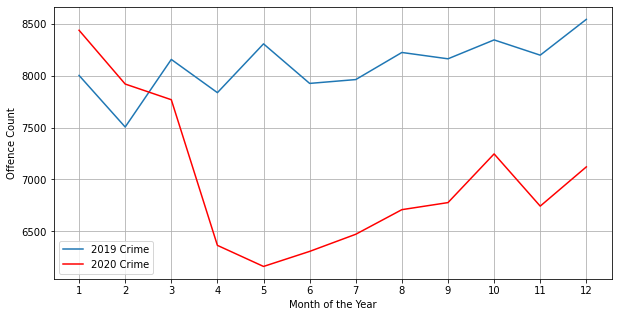

In [199]:
ax = grouped_2019_crime.plot(kind = 'line', x = 'Month', y = 'Offence count', label = '2019 Crime', figsize = (10, 5))
grouped_2020_crime.plot(kind = 'line', x = 'Month', y = 'Offence count', color ='red', xlabel = "Month of the Year", ylabel = 'Offence Count', label = '2020 Crime', ax= ax)
ax.legend()
ax.set_xticks(np.arange(1, 12+1, 1))
plt.grid()
plt.show()